In [1]:
import sys, os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fgsm.deep_convnet import DeepConvNet
from common.functions import softmax
from common.trainer import Trainer

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import model_from_json
from keras.utils import np_utils
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
num_classes = 10
epochs = 20
batch_size = 100

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (60000, 28, 28)
y_train.shape (60000,)
X_test.shape (10000, 28, 28)
y_test.shape (10000,)


In [4]:
X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train,train_size=0.5)
print("X_train1.shape", X_train1.shape)
print("y_train1.shape", y_train1.shape)
print("X_train2.shape", X_train2.shape)
print("y_train2.shape", y_train2.shape)

X_train1.shape (30000, 28, 28)
y_train1.shape (30000,)
X_train2.shape (30000, 28, 28)
y_train2.shape (30000,)


/Users/ryuto/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
X_train1 = X_train1.reshape(X_train1.shape[0], 784).astype('float32') / 255
X_train2 = X_train2.reshape(X_train2.shape[0], 1, 28, 28).astype('float32') / 255

y_train1 = keras.utils.to_categorical(y_train1, num_classes)

X_test1 = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255
X_test2 = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32') / 255

y_test1 = keras.utils.to_categorical(y_test, num_classes)
y_test2 = y_test

In [6]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

W1127 14:14:50.186344 140736894542784 deprecation_wrapper.py:119] From /Users/ryuto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1127 14:14:50.208239 140736894542784 deprecation_wrapper.py:119] From /Users/ryuto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1127 14:14:50.211606 140736894542784 deprecation_wrapper.py:119] From /Users/ryuto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1127 14:14:50.230448 140736894542784 deprecation_wrapper.py:119] From /Users/ryuto/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placehold

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X_train1, y_train1,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test1, y_test1))
score = model.evaluate(X_test1, y_test1, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

W1127 14:14:50.542925 140736894542784 deprecation.py:323] From /Users/ryuto/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 30000 samples, validate on 10000 samples
Epoch 1/20
30000/30000 [==============================] - 5s 157us/step - loss: 0.3246 - acc: 0.8991 - val_loss: 0.1526 - val_acc: 0.9520
Epoch 2/20
30000/30000 [==============================] - 4s 131us/step - loss: 0.1378 - acc: 0.9581 - val_loss: 0.1025 - val_acc: 0.9694
Epoch 3/20
30000/30000 [==============================] - 4s 126us/step - loss: 0.0934 - acc: 0.9715 - val_loss: 0.0974 - val_acc: 0.9706
Epoch 4/20
30000/30000 [==============================] - 4s 130us/step - loss: 0.0730 - acc: 0.9782 - val_loss: 0.0996 - val_acc: 0.9719
Epoch 5/20
30000/30000 [==============================] - 4s 124us/step - loss: 0.0566 - acc: 0.9825 - val_loss: 0.0961 - val_acc: 0.9761
Epoch 6/20
30000/30000 [==============================] - 4s 144us/step - loss: 0.0500 - acc: 0.9847 - val_loss: 0.1053 - val_acc: 0.9741
Epoch 7/20
30000/30000 [==============================] - 4s 147us/step - loss: 0.0407 - acc: 0.9870 - val_loss: 0.0932 - 

In [8]:
model_json_str = model.to_json()
open('mnist_mlp_model_half.json', 'w').write(model_json_str)
model.save_weights('mnist_mlp_weights_half.h5');
print('model saved.')

model saved.


In [13]:
model_pred = model.predict(X_train2.reshape(X_train2.shape[0], 784))
model_pred.shape

(30000, 10)

In [14]:
max_epochs = 5

network = DeepConvNet()
trainer = Trainer(network, X_train2, model_pred, X_test2, y_test2,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr':0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

train loss:2.281419304548943
=== epoch:1, train acc:0.134, test acc:0.131 ===
train loss:2.2915047600473657
train loss:2.2971671039749224
train loss:2.2694230408813776
train loss:2.292703828982368
train loss:2.2613371570795535
train loss:2.2693653931703035
train loss:2.2317517190310245
train loss:2.2473347302263975
train loss:2.2341446023520333
train loss:2.2179519058647896
train loss:2.225723680844179
train loss:2.1959997349531637
train loss:2.1674147628065614
train loss:2.2271876773842685
train loss:2.2123606984222746
train loss:2.1971360505780937
train loss:2.1635264893415176
train loss:2.0859901755063652
train loss:2.150887245238712
train loss:2.1998143729869035
train loss:2.042400872931367
train loss:2.0421013997412847
train loss:2.0899201621029047
train loss:2.1756238385334727
train loss:1.9298596275160305
train loss:2.0658923326945073
train loss:2.0198481705878417
train loss:1.9552130698045795
train loss:2.095578530138086
train loss:2.02869104618809
train loss:2.016365145311923


train loss:1.3346492474783542
train loss:1.2102236665144834
train loss:1.3079246104320479
train loss:1.349595989776029
train loss:1.2965730884812277
train loss:1.169070336579835
train loss:1.2097322921064817
train loss:1.4612606582077177
train loss:1.2820166209742985
train loss:1.229714914924386
train loss:1.2374225095931681
train loss:1.3143959960386835
train loss:1.1863406807035426
train loss:1.3110354616154993
train loss:1.3385915031766698
train loss:1.299512287814476
train loss:1.357877865597132
train loss:1.2172027068162425
train loss:1.2753946539537362
train loss:1.2718452760890682
train loss:1.2445003042488179
train loss:1.4122641709214767
train loss:1.3481262914382106
train loss:1.2520551427717919
train loss:1.303876515358169
train loss:1.1597641557182
train loss:1.1740563785314118
=== epoch:2, train acc:0.96, test acc:0.96 ===
train loss:1.3477095338840437
train loss:1.325339842500861
train loss:1.3320422349823897
train loss:1.2664863423578299
train loss:1.3885972288141857
tra

train loss:1.1852783446814286
train loss:0.8744677180930922
train loss:1.212647641677476
train loss:1.193047389796529
train loss:1.1367792555213376
train loss:1.0080753169455827
train loss:1.215446334841222
train loss:1.3323398598192784
train loss:1.1470639912380667
train loss:1.3182669406650147
train loss:1.1115307654843292
train loss:1.2057129440615768
train loss:1.234049582080768
train loss:1.196809332850657
train loss:1.016611644564796
train loss:1.151852993210931
train loss:1.0500392233909002
train loss:1.14004591216459
train loss:1.047483266963883
train loss:1.174925439510842
train loss:1.1522376529105187
train loss:1.0871624304720093
train loss:1.1337105451260485
train loss:1.17450119095082
train loss:1.1005046618612817
train loss:1.4032747635906828
train loss:1.0742077957261669
train loss:1.1939498611800807
train loss:1.3511856304211818
train loss:1.2967251595426965
train loss:1.1563164910993888
train loss:1.2336616465282624
train loss:1.0571988873426894
train loss:1.1400337710

train loss:1.0903939243069531
train loss:1.1479594281660694
train loss:1.3713401780125885
train loss:1.2493928592346009
train loss:1.0654892951896477
train loss:1.1950328559294865
train loss:1.0348397886776288
train loss:1.1028666806377467
train loss:1.2542869244026413
train loss:1.0417703260063806
train loss:1.2017913771495266
train loss:1.027349062457825
train loss:1.25189395551706
train loss:1.0083160371530913
train loss:1.3151940519789733
train loss:1.0266081099086168
train loss:1.1392256884460483
train loss:1.1107105068018617
train loss:1.23465499377898
train loss:1.121868731399056
train loss:1.0901043719368644
train loss:1.0937555195440825
train loss:1.10452441504933
train loss:1.179697165782134
train loss:1.0120418242051006
train loss:1.1261301053898192
train loss:1.1619287063768644
train loss:1.1202563170943605
train loss:1.0865176920324324
train loss:1.0251807186900648
train loss:1.1019604814393973
train loss:1.162371751554672
train loss:1.0138816720077923
train loss:0.9928835

train loss:1.0777152048023528
train loss:0.9890311353519691
train loss:1.0840251166132224
train loss:1.0757550754538254
train loss:1.2319138009660042
train loss:1.0758410107376017
train loss:0.8516186109216668
train loss:0.9405203198117021
train loss:0.8706797845701169
train loss:1.2582700027640228
train loss:0.9726162162427171
train loss:0.8877852829306385
train loss:1.0824275028620047
train loss:1.075468537867948
train loss:0.9344306780195393
train loss:0.8719998335691905
train loss:0.9345009272521411
train loss:0.8477835723740961
train loss:0.964309798138159
train loss:1.0209895293303684
train loss:1.1380627487742878
train loss:1.0275920797383569
train loss:0.9066251477567536
train loss:1.0127038391395145
train loss:0.9617337557163915
train loss:0.9782349642184472
train loss:1.037527962160439
train loss:1.0034141630104791
train loss:1.1134439094649775
train loss:0.8635670635682088
train loss:0.9768625944954538
train loss:1.1339397629051426
train loss:0.9980868854956612
train loss:1.

train loss:1.0241985696937324
train loss:1.1123455919126004
train loss:0.9214248465846663
train loss:1.0183231486651128
train loss:1.019638730527521
train loss:1.038120486474974
train loss:0.9156729366075744
train loss:1.099485691842083
train loss:1.034907792427221
train loss:0.9643376868298517
train loss:0.9531999279465683
train loss:1.07451282670266
train loss:1.09359845649718
train loss:0.8790393884493366
train loss:1.041387818589572
train loss:1.01764335256484
train loss:0.8878465990148173
train loss:0.9986530968620179
train loss:1.09444212835569
train loss:1.039885201661877
train loss:1.0485340263167346
train loss:1.1233574648405389
train loss:0.9774413168000262
train loss:1.0583355241001167
train loss:1.1270384819901758
train loss:1.0759748950067236
train loss:0.9840232471299984
train loss:1.117442735537715
train loss:1.2029822774303354
train loss:1.0674889882134893
train loss:1.0627628107527292
train loss:1.1043162486976386
train loss:1.1465143092644965
train loss:0.987541925859

In [15]:
test_acc = network.accuracy(X_test2, y_test2)
print("正答率：", test_acc)

正答率： 0.983


Saved Network Parameters!


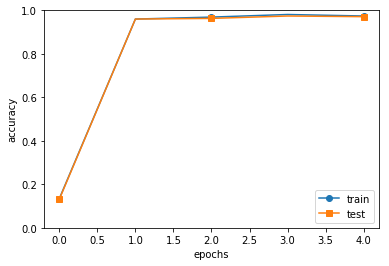

In [16]:
# パラメータの保存
network.save_params("keras_clone_params_half.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
# plt.show()
plt.savefig('graph_keras_clone_half.png')